## Martyna Stajniak

### Analiza danych dotyczących katastrofy Tytanika - missing values
**Opis zestawu danych:** 
- Pclass: Klasa pasażera (1, 2, 3).
- Survived: Status przeżycia (0 = nie przeżył, 1 = przeżył).
- Name: Imię i nazwisko pasażera.
- Sex: Płeć pasażera (male = mężczyzna, female = kobieta).
- Age: Wiek pasażera.
- SibSp: Liczba rodzeństwa/małżonków na pokładzie.
- Parch: Liczba rodziców/dzieci na pokładzie.
- Ticket: Numer biletu.
- Fare: Koszt biletu.
- Cabin: Numer kabiny.
- Embarked: Port załadunku (S = Southampton, C = Cherbourg, Q = Queenstown).
- Boat: Numer łodzi ratunkowej.
- Body: Numer ciała.
- Home.dest: Miejsce przeznaczenia pasażera

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
titanic_data = pd.read_csv('titanic.txt', na_values='?')
titanic_data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


Zbiór danych należy wczytać z odpowiednio ustawionym parametrem 'na_values', ponieważ wartości Nan są oznaczane przez '?'. Po wykonaniu tej czynności można użyć funkcji pd.isnull().sum() oraz pd.isnull().mean().

In [181]:
null_values = titanic_data.isnull().sum()
null_values

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [182]:
titanic_data.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In [183]:
null_percentage = null_values * 100 / len(titanic_data)
print(f"Procent wartości zerowych:\n{null_percentage}")


Procent wartości zerowych:
pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64


**Zmienne, dla których wartości Na jest więcej niż 0:** age, fare, cabin, embarked, boat, body, home.dest

**Zmienne z ilością wartości Na < 5%:** fare, embarked



 **Zmienne z ilością wartości Na > 5%:** age, cabin, boat, body, home.dest

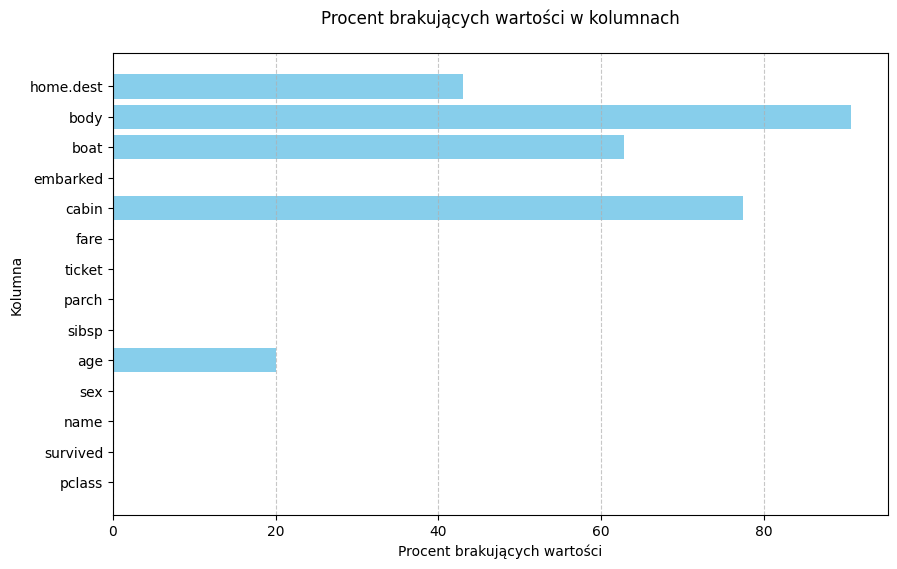

In [184]:
plt.figure(figsize=(10,6))
plt.barh(null_percentage.index, null_percentage.values, color='skyblue')
plt.xlabel('Procent brakujących wartości')
plt.ylabel('Kolumna')
plt.title('Procent brakujących wartości w kolumnach\n')
plt.grid(axis='x', linestyle='--', alpha=0.7)

### Klasyfikacja brakujących wartości do odpowiednich typów.

In [185]:
titanic_data['age_null'] = np.where(titanic_data['age'].isnull(), 1, 0)
titanic_data['body_null'] = np.where(titanic_data['body'].isnull(), 1, 0)
titanic_data['boat_null'] = np.where(titanic_data['boat'].isnull(), 1, 0)
titanic_data['cabin_null'] = np.where(titanic_data['cabin'].isnull(), 1, 0)
titanic_data['home_dest_null'] = np.where(titanic_data['home.dest'].isnull(), 1, 0)

### Kolumna body

In [186]:
titanic_data.groupby('survived')['body'].apply(lambda x: x.isnull().mean())

survived
0    0.850433
1    1.000000
Name: body, dtype: float64

**Typ brakujących wartości:** MNAR <br> Z powyższego zestawienia wynika, że w przypadku osób, które przeżyły katastrofę, 100% z nich miało brakujące dane w kolumnie dotyczącej numeru ciała. Z kolei wśród osób, które nie przeżyły, 85% miało brakujące dane, co może sugerować, że ich ciała nie zostały odnalezione. Zatem brakujące dane w kolumnie 'body' nie są przypadkowe - MNAR.

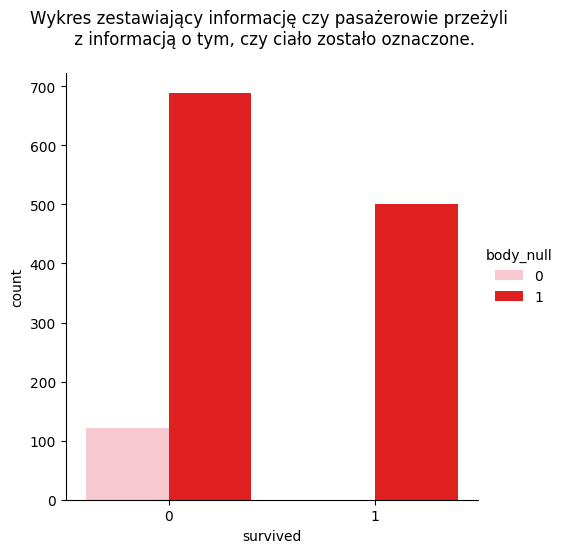

In [187]:
sns.catplot( x ="survived", hue ="body_null",  kind ="count", data = titanic_data, palette = ['pink', 'red']).set(title='Wykres zestawiający informację czy pasażerowie przeżyli \n z informacją o tym, czy ciało zostało oznaczone.\n')

### Kolumna boat

In [188]:
titanic_data.groupby(['survived'])['boat_null'].mean()

survived
0    0.988875
1    0.046000
Name: boat_null, dtype: float64

**Typ brakujących wartości:** MNAR <br> W przypadku osób, które przeżyły katastrofę, zaledwie 5% z nich miało brakujące dane w kolumnie dotyczącej numeru łodzi ratunkowej. Z kolei wśród osób, które nie przeżyły, 99% miało brakujące dane. Tylko osoby, które przeżyły mają przypisany nr łodzi ratunkowej. Zatem brakujące dane w kolumnie 'boat' nie są przypadkowe - MNAR.

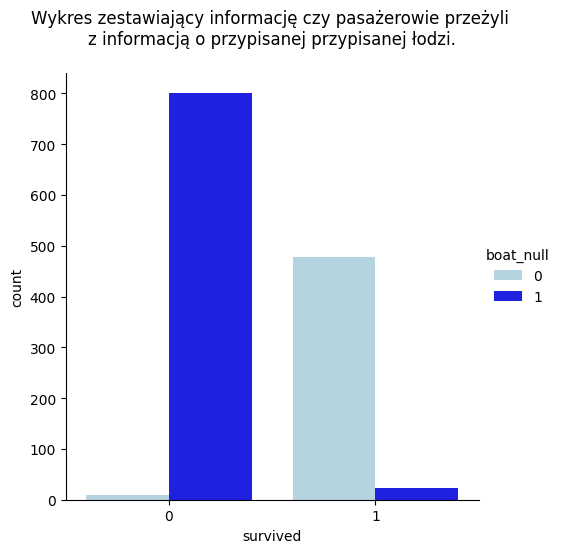

In [189]:
sns.catplot( x ="survived", hue ="boat_null",  kind ="count", data = titanic_data, palette = ['lightblue', 'blue']).set(title='Wykres zestawiający informację czy pasażerowie przeżyli \nz informacją o przypisanej przypisanej łodzi.\n')

### Kolumna cabin

In [190]:
titanic_data.groupby(['pclass'])['cabin_null'].mean()

pclass
1    0.207430
2    0.916968
3    0.977433
Name: cabin_null, dtype: float64

**Typ brakujących wartości:** MNAR <br> Brakujące wratości są powiązane z klasą jaką podróżowali uczestnicy rejsu. Dla pasażerów trzeciej klasy znajduje się aż 98% brakujących wartości, może być to spowodowane tym, że pasażerowie tej klasy nie mieli prywatnych kabin. Podobna sytuacja jest w przypadku pasażerów klasy drugiej, gdzie brakujących wartości jest 92%.

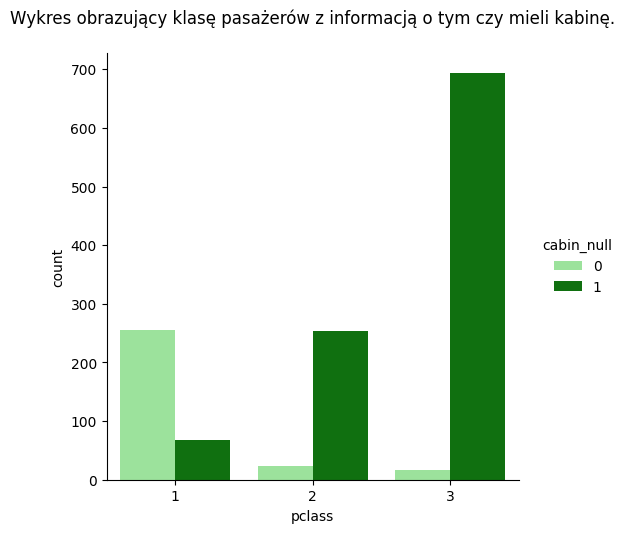

In [191]:
sns.catplot(hue ="cabin_null", x ="pclass",  kind ="count", data = titanic_data, palette = ['lightgreen', 'green']).set(title='Wykres obrazujący klasę pasażerów z informacją o tym czy mieli kabinę.\n')

### Kolumna age

In [192]:
print('Liczba rodzeństwa/małżonków na pokładzie.\n', titanic_data.groupby(['sibsp'])['age_null'].mean(), '\n')
print('Liczba rodziców/dzieci na pokładzie.\n', titanic_data.groupby(['parch'])['age_null'].mean())

Liczba rodzeństwa/małżonków na pokładzie.
 sibsp
0    0.231201
1    0.122257
2    0.142857
3    0.200000
4    0.000000
5    0.000000
8    0.888889
Name: age_null, dtype: float64 

Liczba rodziców/dzieci na pokładzie.
 parch
0    0.233533
1    0.058824
2    0.141593
3    0.000000
4    0.166667
5    0.000000
6    0.000000
9    1.000000
Name: age_null, dtype: float64


**Typ brakujących wartości:** MAR <br> 
Barkujące wartości w kolumnie z informacjami o wieku, mogą wynikać z błędu przy rejestracji lub z trudności oszacownaia wieku.

### Kolumna home.dest

**Typ brakujących wartości:** MAR <br>
Brakujące wratości w kolumnie z danymi o miejscu docelowym, może wynikać z błędów przy rejestracji lub z faktu, iż informacje nie zostały zebrane od wszystkich pasażerów. Brakujące wartości w dużej mierze ( 73% ) pojawiają się dla pasażerów trzeciej klasy.

In [193]:
titanic_data.groupby(['pclass'])['home_dest_null'].mean()

pclass
1    0.105263
2    0.057762
3    0.724965
Name: home_dest_null, dtype: float64

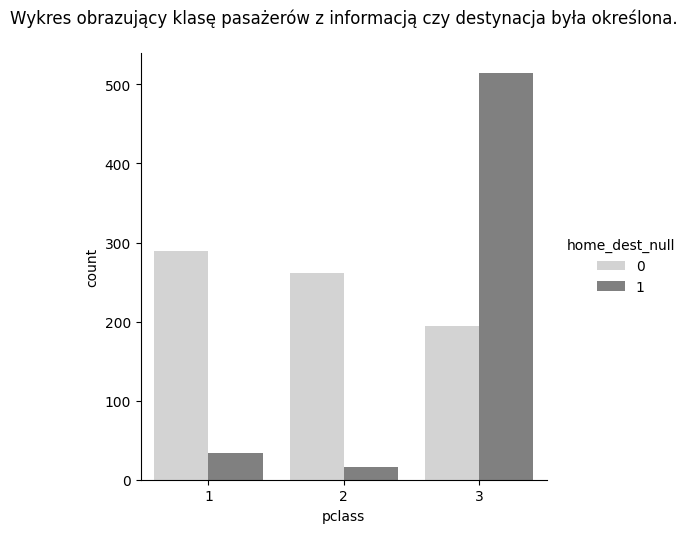

In [194]:
sns.catplot( x ="pclass", hue ="home_dest_null", kind ="count", data = titanic_data, palette = ['lightgray', 'gray']).set(title='Wykres obrazujący klasę pasażerów z informacją czy destynacja była określona.\n')

### Postępowanie w przypadku brakujących danych

#### Brakujące dane, które nie mają znaczenia
Jeżli liczba brakujących wratości jest mneijsza niż 5% liczby wszystkich danych (embarked, fare) - możemy je usunąć lub w zależności od rozkładu danych możemy zastąpić je wartością średnią lub medianą. 
- **Rozkład normalny** - używamy średniej lub mediany
- **Rozkład skośny** - używamy mediany
#### Brakujące dane, które mogą mieć znaczenie
Jeżli brakujące wartości są związane z pewnym mechanizmem przyczynowo-skutkowym, możemy stworzyć nową cechę, która będzie uzupełniać nasze dane.
